<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/3rdWeekTask/CreditDataSet_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# Memuat dataset
file_path = 'sample_data/CreditDataset.csv'
data = pd.read_csv(file_path)

In [276]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang per kolom:\n", data.isnull().sum())

Nilai yang hilang per kolom:
 x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
Class    0
dtype: int64


In [277]:
# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

In [278]:
# Encode variabel kategori menggunakan LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [279]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data.drop(columns='Class')
y = data['Class']

In [280]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [281]:
# Memisahkan data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)


In [282]:
# Menyesuaikan nilai target dari {1, 2} menjadi {0, 1} untuk klasifikasi biner
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [283]:
# Mengatur parameter untuk Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],       # Kriteria pemisahan
    'max_depth': [None, 5, 10, 15, 20],     # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],        # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],          # Minimum sampel di leaf node
}


In [284]:
# Membangun model Decision Tree dengan Grid Search untuk mencari parameter terbaik
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_adjusted)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [285]:
# Menampilkan kombinasi parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [286]:
# Memprediksi hasil pada data test dengan model terbaik
y_pred_adjusted = grid_search.predict(X_test)
y_prob_adjusted = grid_search.predict_proba(X_test)[:, 1]

In [287]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_adjusted, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_adjusted)
class_report = classification_report(y_test_adjusted, y_pred_adjusted)
roc_auc = roc_auc_score(y_test_adjusted, y_prob_adjusted)
fpr, tpr, _ = roc_curve(y_test_adjusted, y_prob_adjusted)

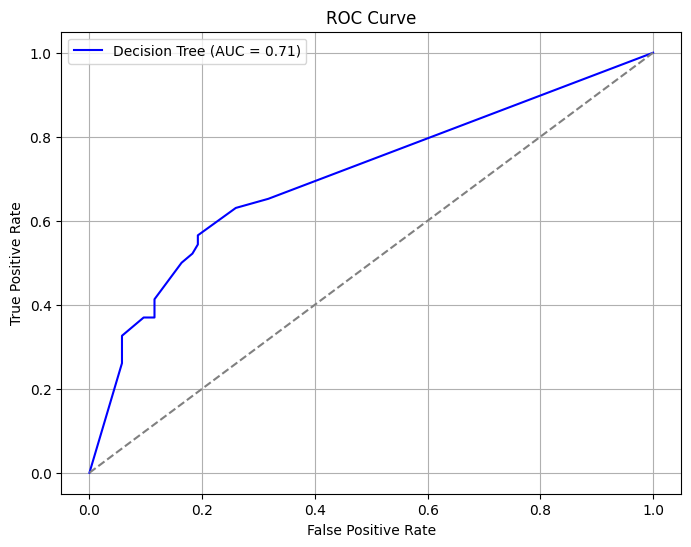

In [288]:
# Menampilkan ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

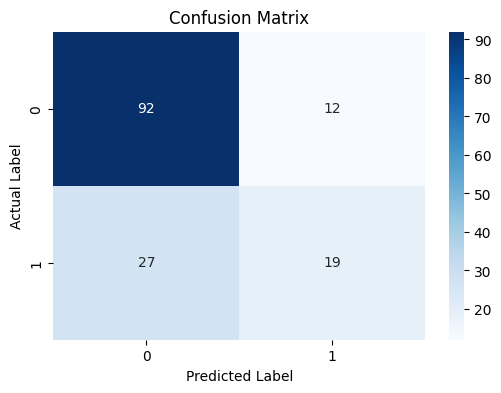

In [289]:
# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [290]:
# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("AUC Score:", roc_auc)

Akurasi: 0.74
Confusion Matrix:
 [[92 12]
 [27 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.83       104
           1       0.61      0.41      0.49        46

    accuracy                           0.74       150
   macro avg       0.69      0.65      0.66       150
weighted avg       0.72      0.74      0.72       150

AUC Score: 0.7061036789297659
